## Base de Dados - Visualização

Agora vamos dar uma visibilidade aos dados, preferencialmente à variavel `Churn`.

Vamos lá

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json('../Dados/dados_tratados.json')
df.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,2.19,Cheque (Correios),65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,2.00,Cheque (Correios),59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,2.46,Cheque (Eletrônico),73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,3.27,Cheque (Eletrônico),98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,2.80,Cheque (Correios),83.9,267.40


A nossa variável de estudo será a `Churn`, neste momento vou tirar os dados faltantes

In [3]:
df_churn = df.dropna(subset=['fl_inativo']).copy()
df_churn.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,2.19,Cheque (Correios),65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,2.00,Cheque (Correios),59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,2.46,Cheque (Eletrônico),73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,3.27,Cheque (Eletrônico),98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,2.80,Cheque (Correios),83.9,267.40


## Analisar a variável target: Churn

In [4]:
contagem_churn = df_churn.fl_inativo.value_counts(normalize=True) * 100
print("{:.1f}% da nossa base tornaram-se inativos (churn)".format(contagem_churn[1]))

26.5% da nossa base tornaram-se inativos (churn)


## Visualizar a distribuição da variável target: Churn

Vou definir uma função que vai facilitar meu trabalho na analise de variáveis categóricas

In [5]:
def conta_relacao_categoricos(x, colA, colB):
    if(x[colA].dtype) == 'O' and (x[colB].dtype) == 'O' :
        return pd.crosstab(index = x[colA], columns = x[colB], normalize = 'columns') * 100
    else:
        print('Uma ou mais colunas não são do tipo categorico')

In [6]:
for coluna in df_churn.columns:
    print("A coluna {} é do tipo {}".format(coluna, df_churn[coluna].dtype))

A coluna id_cliente é do tipo object
A coluna fl_inativo é do tipo object
A coluna sexo é do tipo object
A coluna fl_maior_65_anos é do tipo object
A coluna fl_tem_parceiro é do tipo object
A coluna fl_dependentes é do tipo object
A coluna meses_contrato é do tipo int64
A coluna fl_servico_telefonico é do tipo object
A coluna fl_multiplas_linhas é do tipo object
A coluna tipo_servico_internet é do tipo object
A coluna fl_servico_seguranca_online é do tipo object
A coluna fl_servico_backup_online é do tipo object
A coluna fl_servico_protecao_dispositivo é do tipo object
A coluna fl_servico_suporte_tech é do tipo object
A coluna fl_servico_tv_cabo é do tipo object
A coluna fl_servico_stream é do tipo object
A coluna tipo_contrato é do tipo object
A coluna fl_sem_papel é do tipo object
A coluna valor_servico_diario é do tipo float64
A coluna tipo_pagamento é do tipo object
A coluna valor_servico_mensal é do tipo float64
A coluna valor_servico_total é do tipo float64


## Visualizar a distribuição da variável target: Churn

### Analisando as variáveis categoricas em relação ao Churn

#### Sexo

In [7]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'sexo')

sexo,Feminino,Masculino
fl_inativo,,
Não,73.079128,73.839662
Sim,26.920872,26.160338


O sexo não aparenta tendência em churn

#### 65 anos

In [8]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_maior_65_anos')

fl_maior_65_anos,Não,Sim
fl_inativo,,
Não,76.393832,58.318739
Sim,23.606168,41.681261


Ter mais de 65 anos aparenta maior chance de churn

#### Parceiro

In [9]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_tem_parceiro')

fl_tem_parceiro,Não,Sim
fl_inativo,,
Não,67.042021,80.335097
Sim,32.957979,19.664903


#### Dependentes

In [10]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_dependentes')

fl_dependentes,Não,Sim
fl_inativo,,
Não,68.72086,84.549763
Sim,31.27914,15.450237


#### Serviço Telefônico

In [11]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_telefonico')

fl_servico_telefonico,Não,Sim
fl_inativo,,
Não,75.073314,73.290363
Sim,24.926686,26.709637


O serviço telefônico não aparenta ter tendência a churn

Como os tipos de serviços estão atrelados a posse de um serviço telefônico, irei assumir a hipótese de que o serviço telefônico não aparenta ter tendência a churn

#### Serviço Internet

In [12]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'tipo_servico_internet')

tipo_servico_internet,DSL,Fibra ótica,Nenhum
fl_inativo,,,
Não,81.040892,58.107235,92.59502
Sim,18.959108,41.892765,7.40498


Ter um serviço de internet, principalmente fibra ótica, tem forte relação ao churn!

In [13]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_seguranca_online')

fl_servico_seguranca_online,Não,Sim
fl_inativo,,
Não,68.670382,85.388806
Sim,31.329618,14.611194


In [14]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_backup_online')

fl_servico_backup_online,Não,Sim
fl_inativo,,
Não,70.827915,78.468506
Sim,29.172085,21.531494


In [15]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_protecao_dispositivo')

fl_servico_protecao_dispositivo,Não,Sim
fl_inativo,,
Não,71.348193,77.497936
Sim,28.651807,22.502064


In [16]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_suporte_tech')

fl_servico_suporte_tech,Não,Sim
fl_inativo,,
Não,68.813763,84.833659
Sim,31.186237,15.166341


Não ter suporte técnico tem relação ao churn

In [17]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_tv_cabo')

fl_servico_tv_cabo,Não,Sim
fl_inativo,,
Não,75.668819,69.929812
Sim,24.331181,30.070188


In [18]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_servico_stream')

fl_servico_stream,Não,Sim
fl_inativo,,
Não,75.620506,70.058565
Sim,24.379494,29.941435


#### Tipo de contrato

In [19]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'tipo_contrato')

tipo_contrato,Anual,Bienal,Mensal
fl_inativo,,,
Não,88.730482,97.168142,57.290323
Sim,11.269518,2.831858,42.709677


Contratos mensais tiveram mais efeitos de churn

#### _Paperless_

In [20]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'fl_sem_papel')

fl_sem_papel,Não,Sim
fl_inativo,,
Não,83.669916,66.434908
Sim,16.330084,33.565092


#### Tipo de pagamento

In [21]:
conta_relacao_categoricos(x=df_churn, colA = 'fl_inativo', colB = 'tipo_pagamento')

tipo_pagamento,Cartão de Crédito,Cheque (Correios),Cheque (Eletrônico),Transferência Bancária
fl_inativo,,,,
Não,84.756899,80.8933,54.714588,83.290155
Sim,15.243101,19.1067,45.285412,16.709845


Cheque eletrônicos teve grande importância no churn

### Conclusões para as variáveis categóricas

As variávies que tem maior relação com o churn são:

1. **Tem 65 anos**: Sim
1. **Serviço de Internet**: Fibra Ótica
1. **Tipo de contrato**: Mensal
1. **Tipo de pagamento**: Cheque Eletrônico

### Analisando as variáveis quantitativas em relação ao Churn

In [22]:
df_churn.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,2.19,Cheque (Correios),65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,2.00,Cheque (Correios),59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,2.46,Cheque (Eletrônico),73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,3.27,Cheque (Eletrônico),98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,2.80,Cheque (Correios),83.9,267.40


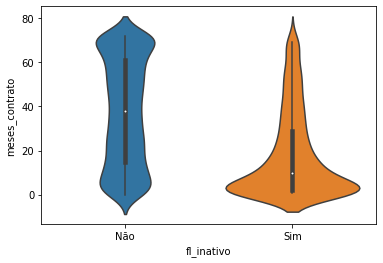

In [23]:
sns.violinplot(data=df_churn, x='fl_inativo', y='meses_contrato');

Indicação de que o churn está mais concentrado nos contratos de menores periodos

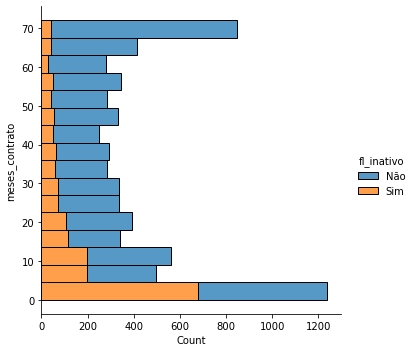

In [24]:
sns.displot(df_churn, y='meses_contrato', hue='fl_inativo', multiple='stack');

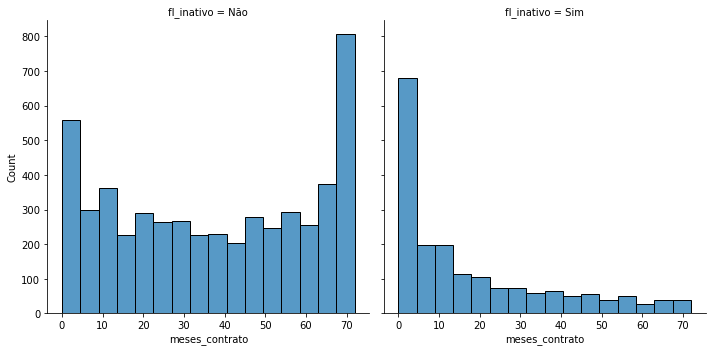

In [25]:
sns.displot(df_churn, x='meses_contrato', col='fl_inativo');

Vou explorar um pouco a questão do tempo de contrato

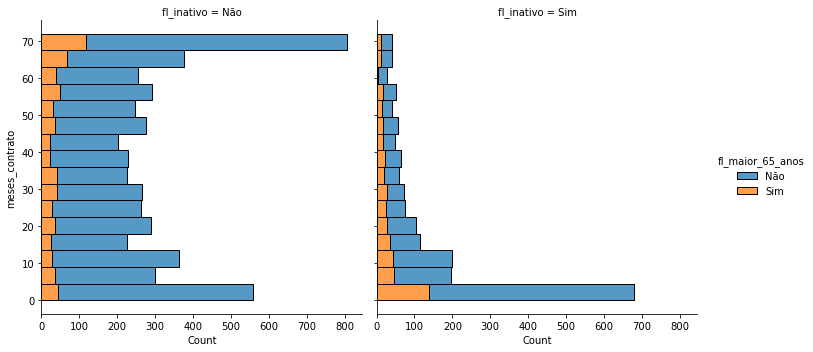

In [26]:
sns.displot(df_churn, y='meses_contrato', col='fl_inativo', hue='fl_maior_65_anos', multiple='stack');

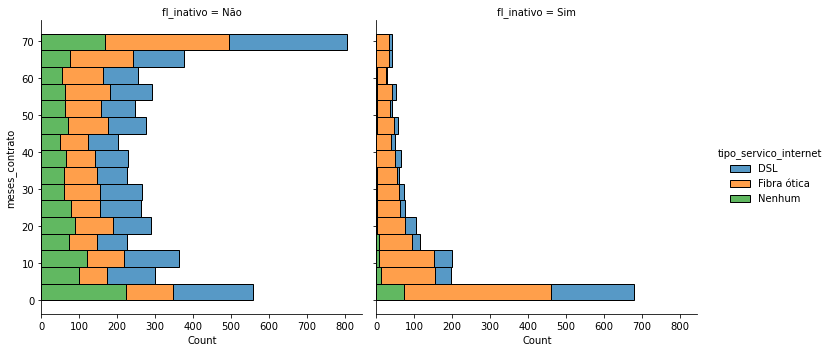

In [27]:
sns.displot(df_churn, y='meses_contrato', col='fl_inativo', hue='tipo_servico_internet', multiple='stack');

Fibra ótica destoa muito dos outros serviços

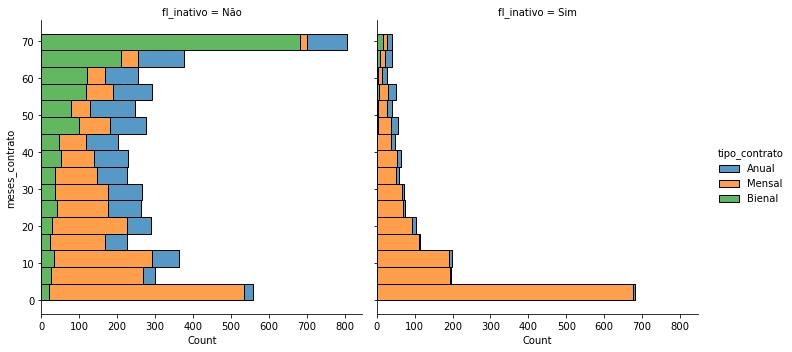

In [28]:
sns.displot(df_churn, y='meses_contrato', col='fl_inativo', hue='tipo_contrato', multiple='stack');

Os contratos mensais aparentam ser problematicos

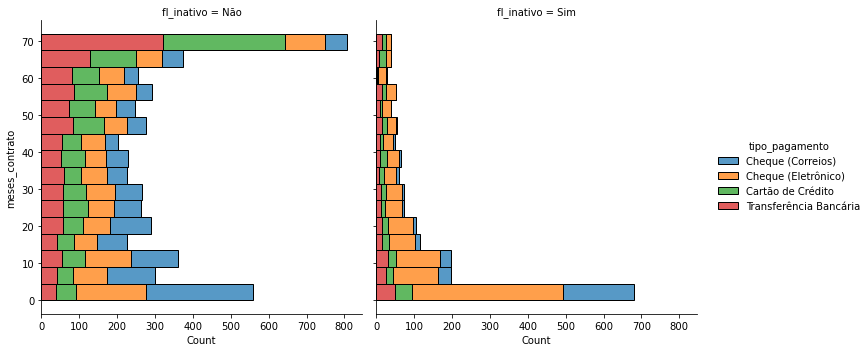

In [29]:
sns.displot(df_churn, y='meses_contrato', col='fl_inativo', hue='tipo_pagamento', multiple='stack');

Analisando os valores de serviço

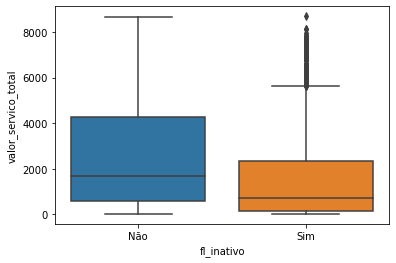

In [30]:
sns.boxplot(data=df_churn, x='fl_inativo', y='valor_servico_total');

Um tanto quanto óbvio assumir que os inativos gastaram menos do que os ativos ...

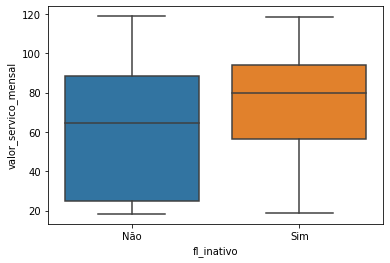

In [31]:
sns.boxplot(data=df_churn, x='fl_inativo', y='valor_servico_mensal');

... Mas se olhar os valores mensais praticados é maior entre os que sairam. Interessante

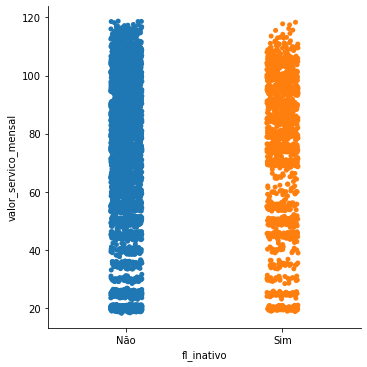

In [32]:
sns.catplot(data=df_churn, x='fl_inativo', y='valor_servico_mensal')

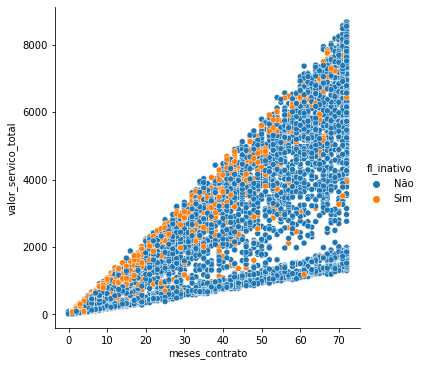

In [33]:
sns.relplot(data=df_churn, x='meses_contrato', y='valor_servico_total', hue='fl_inativo')

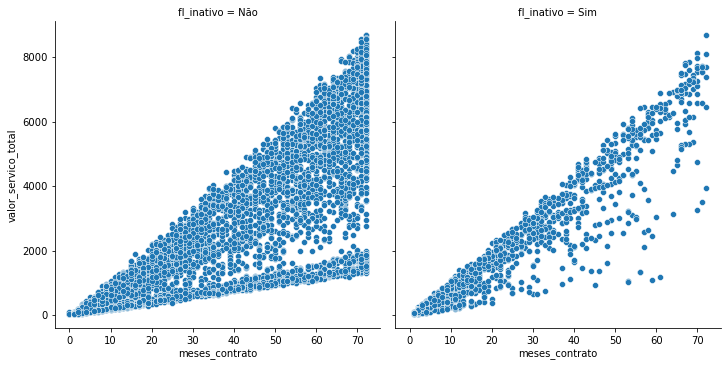

In [34]:
sns.relplot(data=df_churn, x='meses_contrato', y='valor_servico_total', col='fl_inativo')

Os churns estão mais concentrados nos maiores valores de contrato

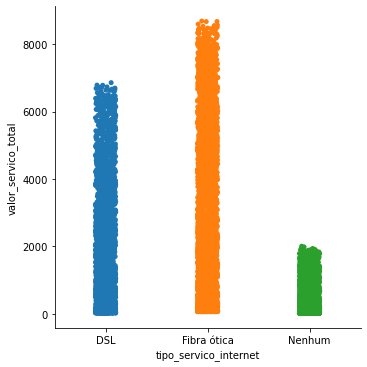

In [35]:
sns.catplot(data=df_churn, y='valor_servico_total', x='tipo_servico_internet')

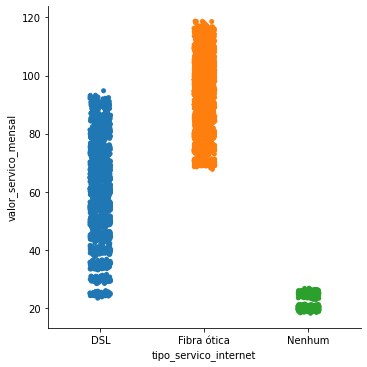

In [36]:
sns.catplot(data=df_churn, y='valor_servico_mensal', x='tipo_servico_internet')

O serviço de Fibra ótica, que tem grande proporção no Churn tem os maiores valores de serviços praticados. Os valores altos como vimos está presente nos clientes que se inativaram

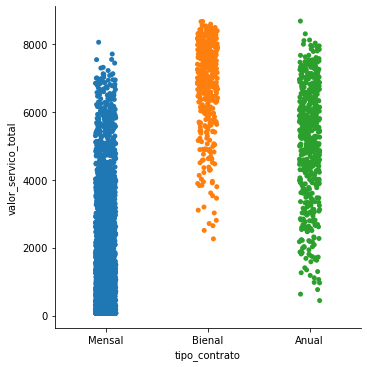

In [37]:
sns.catplot(data=df_churn.query("tipo_servico_internet == 'Fibra ótica'"), 
            y='valor_servico_total', 
            x='tipo_contrato')

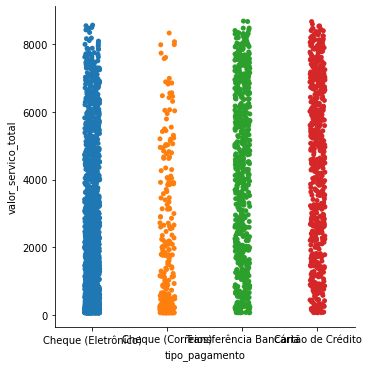

In [38]:
sns.catplot(data=df_churn.query("tipo_servico_internet == 'Fibra ótica'"), 
            y='valor_servico_total', 
            x='tipo_pagamento')

### Analisar a correlação das variáveis

Para trazer as correlações irei transformar os dados categoricos em númericos. Para os que possuem mais de um valor ou não representam 'Sim / Não' irei atribuir um peso conforme a sua relação com o churn. (Isso vai enviezar, eu sei)

In [39]:
df_churn.columns

Index(['id_cliente', 'fl_inativo', 'sexo', 'fl_maior_65_anos',
       'fl_tem_parceiro', 'fl_dependentes', 'meses_contrato',
       'fl_servico_telefonico', 'fl_multiplas_linhas', 'tipo_servico_internet',
       'fl_servico_seguranca_online', 'fl_servico_backup_online',
       'fl_servico_protecao_dispositivo', 'fl_servico_suporte_tech',
       'fl_servico_tv_cabo', 'fl_servico_stream', 'tipo_contrato',
       'fl_sem_papel', 'valor_servico_diario', 'tipo_pagamento',
       'valor_servico_mensal', 'valor_servico_total'],
      dtype='object')

Começando pelas variáveis de flag

In [40]:
df_corr = df_churn.copy()

In [41]:
sim_nao = {'Sim': 1, 'Não': 0}
colunas = df_corr.filter(like='fl_').columns
for coluna in colunas:
    df_corr[coluna].replace(sim_nao, inplace=True)
df_corr.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,2.19,Cheque (Correios),65.6,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,2.00,Cheque (Correios),59.9,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra ótica,...,1,0,0,0,Mensal,1,2.46,Cheque (Eletrônico),73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra ótica,...,1,0,1,1,Mensal,1,3.27,Cheque (Eletrônico),98.0,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra ótica,...,0,1,1,0,Mensal,1,2.80,Cheque (Correios),83.9,267.40


A variável `tipo_servico_internet` vimos que tem grande participação no Churn. Por não ser possível ordená-la irei utilizar o Encoding, visto no [curso](https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude) de _Machine Learning_

In [42]:
df_corr = pd.get_dummies(data=df_corr, columns=['tipo_servico_internet', 'tipo_contrato', 'tipo_pagamento'])

In [43]:
df_corr.columns

Index(['id_cliente', 'fl_inativo', 'sexo', 'fl_maior_65_anos',
       'fl_tem_parceiro', 'fl_dependentes', 'meses_contrato',
       'fl_servico_telefonico', 'fl_multiplas_linhas',
       'fl_servico_seguranca_online', 'fl_servico_backup_online',
       'fl_servico_protecao_dispositivo', 'fl_servico_suporte_tech',
       'fl_servico_tv_cabo', 'fl_servico_stream', 'fl_sem_papel',
       'valor_servico_diario', 'valor_servico_mensal', 'valor_servico_total',
       'tipo_servico_internet_DSL', 'tipo_servico_internet_Fibra ótica',
       'tipo_servico_internet_Nenhum', 'tipo_contrato_Anual',
       'tipo_contrato_Bienal', 'tipo_contrato_Mensal',
       'tipo_pagamento_Cartão de Crédito', 'tipo_pagamento_Cheque (Correios)',
       'tipo_pagamento_Cheque (Eletrônico)',
       'tipo_pagamento_Transferência Bancária'],
      dtype='object')

Vou melhorar um pouco estas colunas

In [44]:
colunas_nome = {
    'tipo_servico_internet_DSL': 'fl_servico_internet_dsl', 
    'tipo_servico_internet_Fibra ótica': 'fl_servico_internet_fibra_otica',
    'tipo_servico_internet_Nenhum': 'fl_sem_servico_internet', 
    'tipo_contrato_Anual': 'fl_contrato_anual',
    'tipo_contrato_Bienal': 'fl_contrato_bienal', 
    'tipo_contrato_Mensal': 'fl_contrato_mensal',
    'tipo_pagamento_Cartão de Crédito': 'fl_pagamento_ccredito',
    'tipo_pagamento_Cheque (Correios)': 'fl_pagamento_cheque_correio',
    'tipo_pagamento_Cheque (Eletrônico)': 'fl_pagamento_cheque_eletronico',
    'tipo_pagamento_Transferência Bancária': 'fl_pagamento_transf_bancaria'
}
df_corr.rename(columns=colunas_nome, inplace=True)

In [45]:
df_corr.corr()

,fl_inativo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,fl_servico_backup_online,fl_servico_protecao_dispositivo,...,fl_servico_internet_dsl,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria
fl_inativo,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,...,-0.124214,0.308020,-0.227890,-0.177820,-0.302253,0.405103,-0.134302,-0.091683,0.301919,-0.117937
fl_maior_65_anos,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,-0.108322,0.255338,-0.182742,-0.046262,-0.117000,0.138360,-0.024135,-0.153477,0.171718,-0.016159
fl_tem_parceiro,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000851,0.000304,0.000615,0.082783,0.248091,-0.280865,0.082029,-0.095125,-0.083852,0.110706
fl_dependentes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,0.052010,-0.165818,0.139812,0.068368,0.204613,-0.231720,0.060267,0.059071,-0.150642,0.052021
meses_contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.013274,0.019720,-0.039062,0.202570,0.558533,-0.645561,0.233006,-0.233852,-0.208363,0.243510
fl_servico_telefonico,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.452425,0.289999,0.172209,-0.002791,0.003519,-0.000742,-0.007721,-0.003319,0.003062,0.007556
fl_multiplas_linhas,0.040102,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,-0.199920,0.366083,-0.210564,-0.003794,0.106253,-0.088203,0.060048,-0.227206,0.083618,0.075527
fl_servico_seguranca_online,-0.171226,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.321269,-0.030696,-0.333403,0.100162,0.191773,-0.246679,0.115721,-0.080798,-0.112338,0.095158
fl_servico_backup_online,-0.082255,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.157884,0.165651,-0.381593,0.083722,0.111400,-0.164172,0.090785,-0.174164,-0.000408,0.087004
fl_servico_protecao_dispositivo,-0.066160,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.146291,0.176049,-0.380754,0.102495,0.165096,-0.225662,0.111554,-0.187373,-0.003351,0.083115


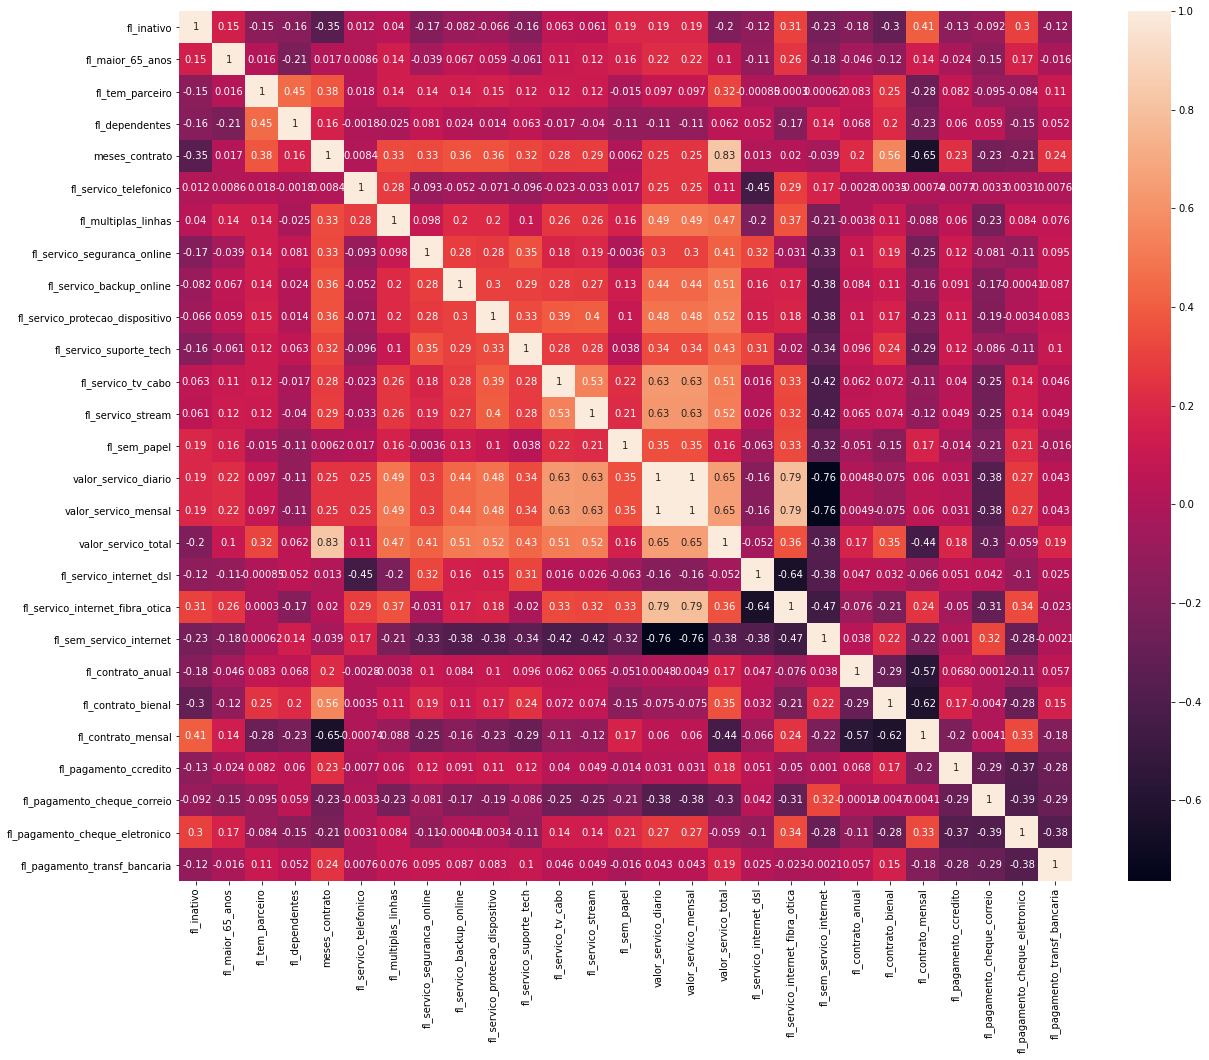

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(df_corr.corr(), annot=True)
plt.show()

In [47]:
df_corr.to_json('../Dados/df_para_ml.json')

### Conclusão

De acordo com as análises visuais, os indicadores mais fortes para o Churn são: Tipo de serviço de internet (Fibra Ótica), Valores (os churns apresentam maior concentração em clientes que os valores totais alto em relação ao tempo de contrato, além de ter um valor médio mensal maior do que os clientes não churn)